# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
units='metric'   

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novaya lyalya
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | adelaide
Processing Record 10 of Set 1 | madang
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | statesboro
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | pleshanovo
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | vilyuysk
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | n

Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | luwingu
Processing Record 40 of Set 4 | sinkat
City not found. Skipping...
Processing Record 41 of Set 4 | harper
Processing Record 42 of Set 4 | rayadrug
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | ahuimanu
Processing Record 45 of Set 4 | sao sebastiao
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | tilichiki
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | broken hill
Processing Record 0 of Set 5 | dikson
Processing Record 1 of Set 5 | yanan
City not found. Skipping...
Processing Record 2 of Set 5 | nyurba
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | mounana
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | dhidhdhoo
Processing Record 7 of Set 5 | vanavara
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of S

City not found. Skipping...
Processing Record 28 of Set 8 | karamay
City not found. Skipping...
Processing Record 29 of Set 8 | thouars
Processing Record 30 of Set 8 | bireun
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | magbay
Processing Record 33 of Set 8 | constitucion
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | raga
Processing Record 36 of Set 8 | bardiyah
Processing Record 37 of Set 8 | carahue
Processing Record 38 of Set 8 | waddan
Processing Record 39 of Set 8 | luena
Processing Record 40 of Set 8 | maralal
Processing Record 41 of Set 8 | norton shores
Processing Record 42 of Set 8 | mananara
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | ayapa
Processing Record 45 of Set 8 | camacha
Processing Record 46 of Set 8 | lakatoro
Processing Record 47 of Set 8 | jardim
Processing Record 48 of Set 8 | kumluca
Processing Record 49 of Set 8 | conakry
Processing Record 0 of Set 9 | yozgat
Processing Record 1 

Processing Record 15 of Set 12 | kenai
Processing Record 16 of Set 12 | dunedin
Processing Record 17 of Set 12 | cravo norte
Processing Record 18 of Set 12 | kabare
Processing Record 19 of Set 12 | borovoy
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | kuche
City not found. Skipping...
Processing Record 22 of Set 12 | hibbing
Processing Record 23 of Set 12 | emba
Processing Record 24 of Set 12 | grindavik
Processing Record 25 of Set 12 | urubicha
Processing Record 26 of Set 12 | maragogi
Processing Record 27 of Set 12 | flinders
Processing Record 28 of Set 12 | vila velha
Processing Record 29 of Set 12 | dukat
Processing Record 30 of Set 12 | boralday
Processing Record 31 of Set 12 | kahului
Processing Record 32 of Set 12 | marovoay
Processing Record 33 of Set 12 | new richmond
Processing Record 34 of Set 12 | thohoyandou
Processing Record 35 of Set 12 | la ronge
Processing Record 36 of Set 12 | horta
Processing Record 37 of Set 12 | tigzirt
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novaya lyalya,59.0550,60.5990,1.09,98,100,6.13,RU,1678370244
1,severo-kurilsk,50.6789,156.1250,-2.92,84,32,7.22,RU,1678370244
2,faanui,-16.4833,-151.7500,27.88,73,79,4.06,PF,1678370245
3,barrow,71.2906,-156.7887,-21.99,77,0,6.17,US,1678369963
4,puerto ayora,-0.7393,-90.3518,25.31,94,100,0.89,EC,1678370245


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_data.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novaya lyalya,59.0550,60.5990,1.09,98,100,6.13,RU,1678370244
1,severo-kurilsk,50.6789,156.1250,-2.92,84,32,7.22,RU,1678370244
2,faanui,-16.4833,-151.7500,27.88,73,79,4.06,PF,1678370245
3,barrow,71.2906,-156.7887,-21.99,77,0,6.17,US,1678369963
4,puerto ayora,-0.7393,-90.3518,25.31,94,100,0.89,EC,1678370245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

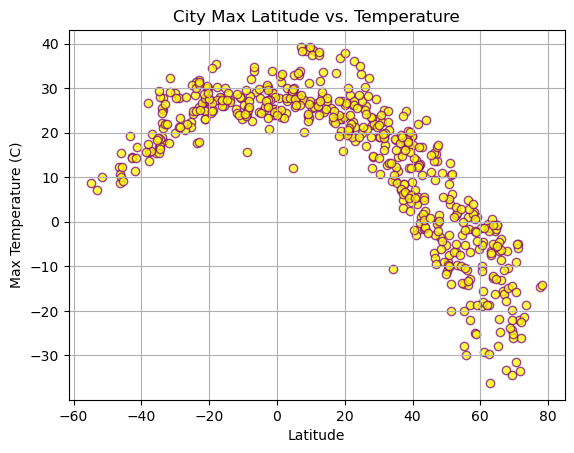

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],facecolor="yellow", edgecolor="purple", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/MyFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

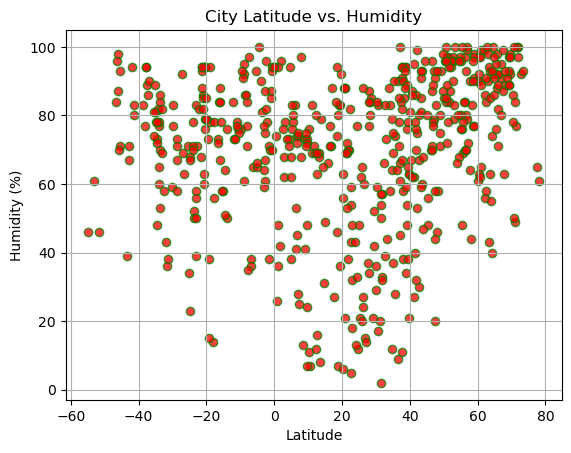

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],facecolor="red", edgecolor="green", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/MyFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

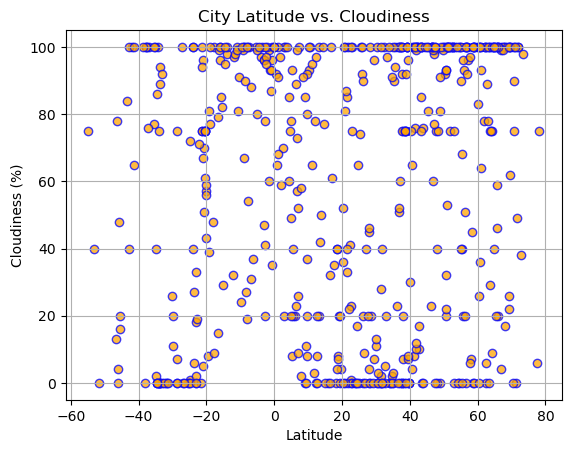

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],facecolor="orange", edgecolor="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/MyFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

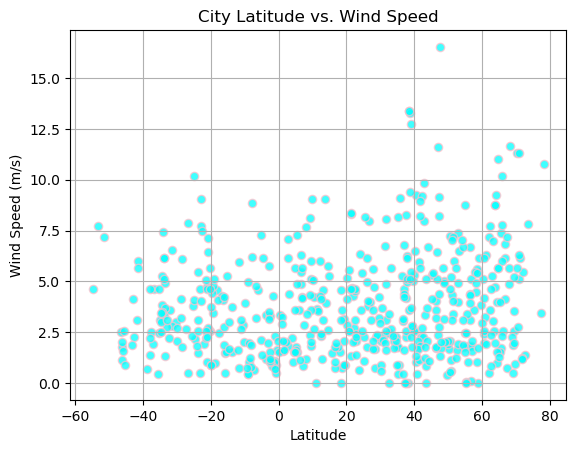

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],facecolor="cyan", edgecolor="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/MyFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    # Calculate the regression line slope and intercept
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
     # Add the regression line to the plot
    regression_value = x_values * slope + intercept
    
    # Add the equation of the line to the plot
    line_eq = "y =" +  str(round(slope, 2)) + "x+" + str(round(intercept, 2))  
    
    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_value, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    #Print out r value 
    print(f'the r-value is: {rvalue**2}')
    
    # Show the plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novaya lyalya,59.0550,60.5990,1.09,98,100,6.13,RU,1678370244
1,severo-kurilsk,50.6789,156.1250,-2.92,84,32,7.22,RU,1678370244
3,barrow,71.2906,-156.7887,-21.99,77,0,6.17,US,1678369963
5,qaanaaq,77.4840,-69.3632,-14.71,65,6,3.46,GL,1678370245
6,narsaq,60.9167,-46.0500,-4.56,65,100,3.25,GL,1678370245


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,faanui,-16.4833,-151.7500,27.88,73,79,4.06,PF,1678370245
4,puerto ayora,-0.7393,-90.3518,25.31,94,100,0.89,EC,1678370245
7,adelaide,-34.9333,138.6000,16.73,81,40,3.09,AU,1678369737
8,madang,-5.2246,145.7966,24.61,93,100,2.11,PG,1678370246
10,ushuaia,-54.8000,-68.3000,8.81,46,75,4.63,AR,1678370190


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.7800863447475133


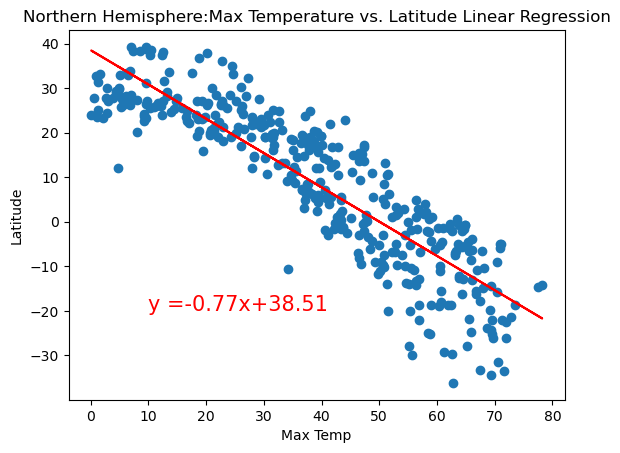

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Northern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (10,-20)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is a very strong negative correlation between max temperature and latitude on the northern Hemisphere.The number of latitude in the northern hemisphere accountes for 78.0% (r-value = 0.7800...) of the variation in max temperature which means that the latitude in the northern hemisphere itself 'strongly' explain the variation in max temperature.

the r-value is: 0.4541825461321509


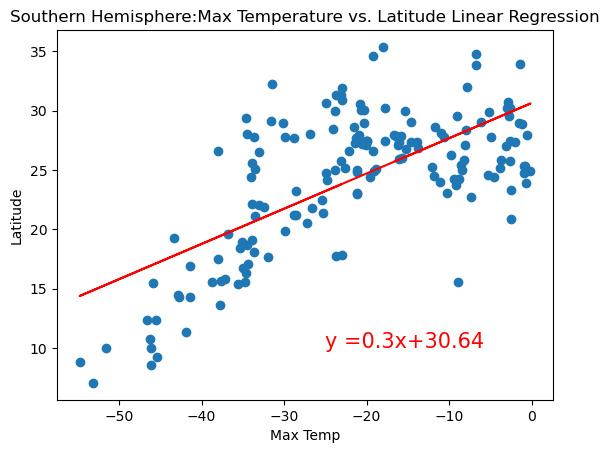

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Southern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (-25,10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is a weak positive correlation between a temperature and latitude on the southern Hemisphere.The number of latitude in the sourthern hemisphere accountes for 45.4% (r-value = 0.4541...) of the variation in max temperature which means that the latitude in the southern hemisphere itself 'weakly' explain the variation in max temperature.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.1761173717737572


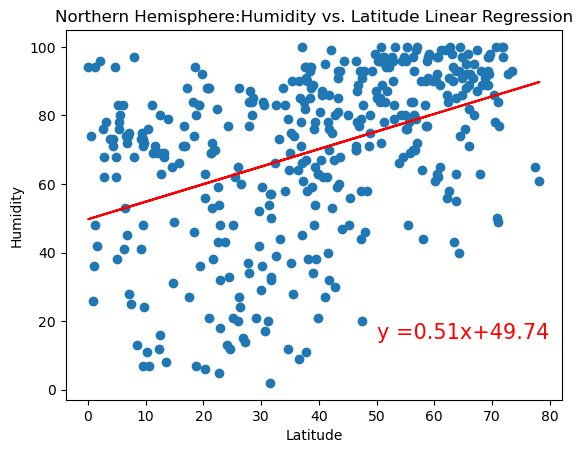

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Northern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (50,15)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is very weak positive correlation between a humidity and latitude on the Northern Hemisphere.The number of latitude in the Northern hemisphere accountes for 17.61% (r-value = 0.1761...) of the variation in humidity which means that the latitude in the Northern hemisphere itself doesnt really explain the variation in humidity.

the r-value is: 0.0026394533734306314


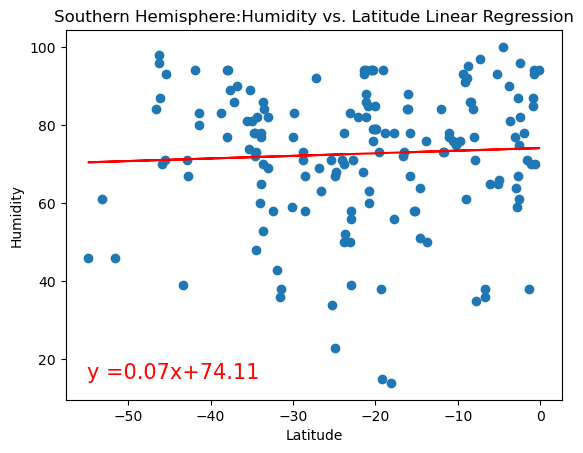

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Southern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (-55,15)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is no correlation between a humidity and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 2.63% (r-value = 0.0263...) of the variation in humidity which means that the latitude in the southern hemisphere itself doesnt explain the variation in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.049579299742617364


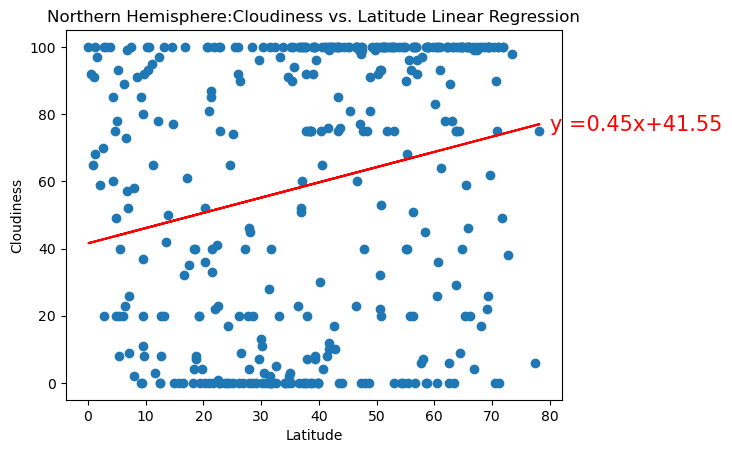

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Northern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (80,75)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is no correlation between a cloudiness and latitude on the Northern Hemisphere.The number of latitude in the Northern hemisphere accountes for 4.96% (r-value = 0.0495...) of the variation in cloudiness which means that the latitude in the Northern hemisphere itself doesnt explain the variation in cloudiness.

the r-value is: 0.1298485645874346


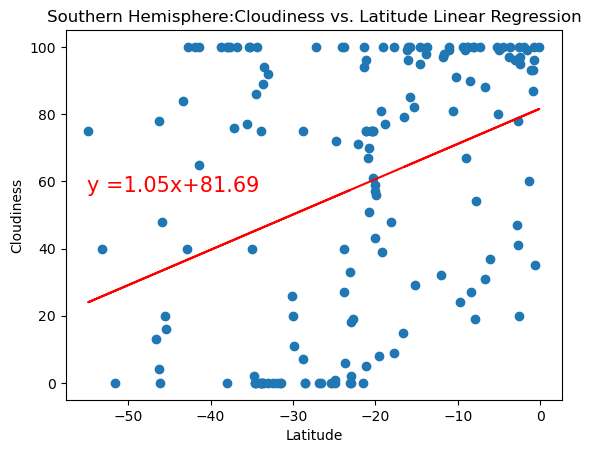

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-55,57)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is no correlation between a cloudiness and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 12.98% (r-value = 0.1298...) of the variation in cloudiness which means that the latitude in the southern hemisphere itself doesnt explain the variation in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.018799557274771485


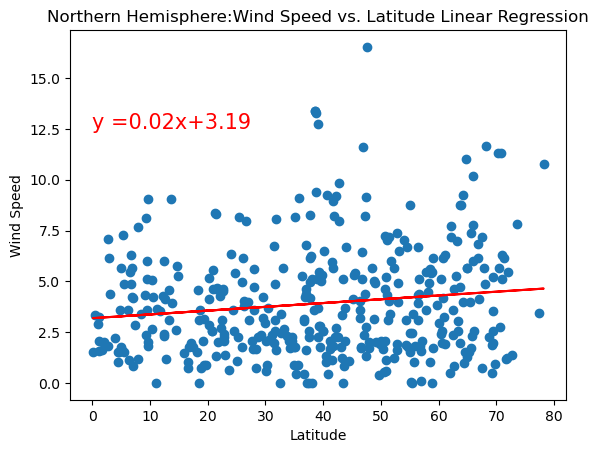

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Northern Hemisphere:Wind Speed vs. Latitude Linear Regression"
text_coordinates = (0,12.5)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude on the Northern Hemisphere.The number of latitude in the Northern Hemisphere accountes for 0.19% (r-value = 0.0018...) of the variation in wind speed which means that the latitude in the Northern Hemisphere itself doesnt explain the variation in wind speed. 

the r-value is: 0.03548475231834896


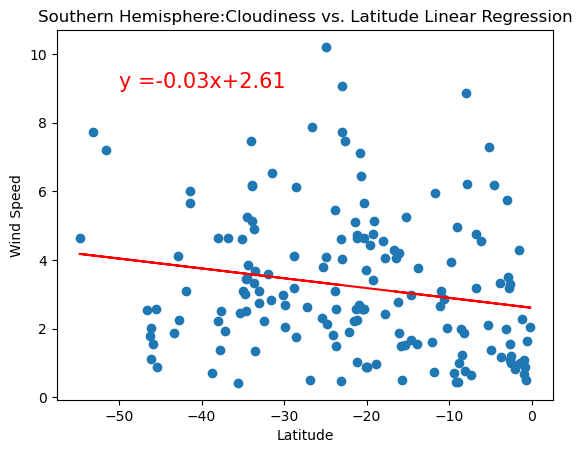

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-50,9)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** There is a very weak negative correlation between wind speed and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 3.55% (r-value = 0.0354...) of the variation in wind speed which means that the latitude in the southern hemisphere itself doesnt explain the variation in wind speed.   